   CustomerID  AnnualIncome  SpendingScore
0           1            15             39
1           2            16             81
2           3            17              6
3           4            18             77
4           5            19             40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     10 non-null     int64
 1   AnnualIncome   10 non-null     int64
 2   SpendingScore  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes
None
       CustomerID  AnnualIncome  SpendingScore
count    10.00000      10.00000      10.000000
mean      5.50000      19.50000      49.400000
std       3.02765       3.02765      35.094159
min       1.00000      15.00000       3.000000
25%       3.25000      17.25000      14.250000
50%       5.50000      19.50000      56.000000
75%       7.75000      21.75000      76.750000
max    

C:\Users\DEBLINA SARKAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DEBLINA SARKAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DEBLINA SARKAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DEBLINA SARKAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

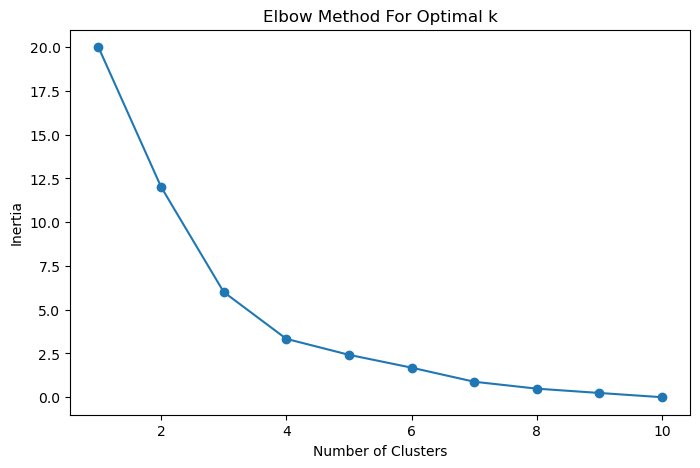

C:\Users\DEBLINA SARKAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DEBLINA SARKAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


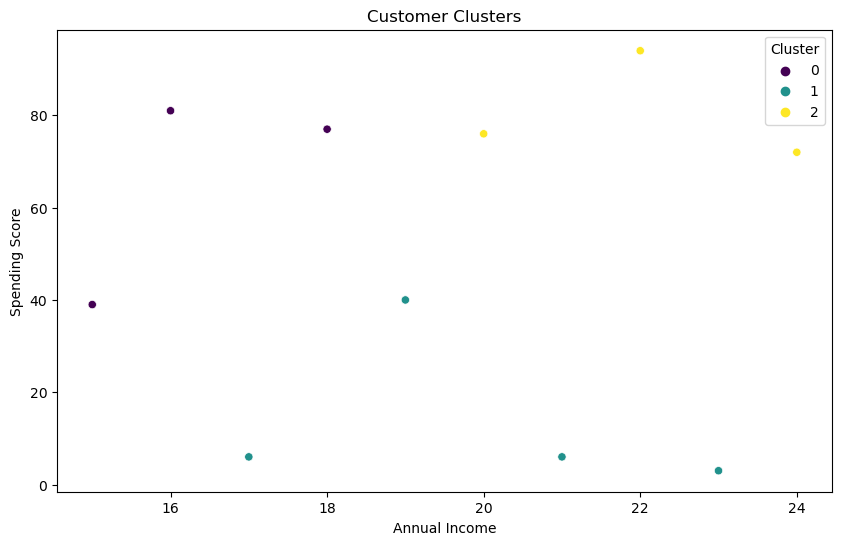

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('customer_data.csv')

print(data.head())
print(data.info())
print(data.describe())

features = data[['AnnualIncome', 'SpendingScore']]

print(features.isnull().sum())

features = features.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()